## Projeto de análise de dados usando Pandas
### Módulo Técnicas de Programação
#### Prof. Joelson
#### Aluno: Paulo Santos

Antes de responder às perguntas, vou realizar uma limpeza de dados.<br>
A maioria das perguntas são relativas à países. Nos arquivos, no entanto, há medidas que tratam de medidas mundiais, continentais e até mesmo de classes sociais.<br>
Assim, para evitar ter que realizar essa limpeza em cada uma das perguntas que tratam apenas de países, irei realizá-la aqui e cada pergunta começará fazendo uma ou mais cópias dos dataframes necessários.

In [136]:
# importando libs necessárias
import pandas as pd
import matplotlib.pyplot as plt

In [137]:
# Retira dos dfs medidas que não são relativas a países
not_countries = ['World', 'Asia', 'Lower middle income', 'Upper middle income', 'Africa', 'High income', 'Europe', 'Low income', 'North America', 'European Union', 'South America', 'Oceania']

covid_deaths = pd.read_csv("COVID DEATHS.csv")
covid_deaths_countries = covid_deaths[~covid_deaths['location'].isin(not_countries)]

covid_vaccinations = pd.read_csv("COVID_VACCINATIONS.csv")
covid_vaccinations_countries = covid_vaccinations[~covid_vaccinations['location'].isin(not_countries)]

#### Pergunta 1: Os 10 paises com maior população tiveram maiores números, em proporção, de mortes por Covid-19?

In [138]:
# copia df e seleciona colunas que serão usadas
countries_populations_deaths = covid_deaths_countries.copy()
countries_populations_deaths = countries_populations_deaths[['iso_code', 'location', 'population', 'total_deaths']]

# Agrupa os dados por país e pega índices das linhas onde a coluna total_deaths é máxima por país 
total_deaths_by_country_idxs = countries_populations_deaths.groupby('location')['total_deaths'].idxmax()

# Retira países que não tem total_deaths (exemplo: Western Sahara)
total_deaths_by_country_idxs_cleaned = total_deaths_by_country_idxs.dropna(axis=0, how='any')

# Seleciona linhas no df original onde cada país tem o máximo de mortes
total_deaths_by_country = countries_populations_deaths.loc[total_deaths_by_country_idxs_cleaned]

# Ordena por população
countries_ordered_by_population = total_deaths_by_country.sort_values(by=['population'], ascending=False)

# Cria nova coluna com % de mortes
countries_ordered_by_population['death_rate_%'] = countries_ordered_by_population['total_deaths']/countries_ordered_by_population['population'] * 100

# Cria novas colunas com rankings por taxa de mortalidade e população
countries_ordered_by_population['death_rate_rank'] = countries_ordered_by_population['death_rate_%'].rank(ascending=False)
countries_ordered_by_population['population_rank'] = countries_ordered_by_population['population'].rank(ascending=False)

# Reseta índices e mostra apenas os 10 primeiros países
countries_ordered_by_population = countries_ordered_by_population.reset_index(drop=True).head(10)

countries_ordered_by_population

,iso_code,location,population,total_deaths,death_rate_%,death_rate_rank,population_rank
0,CHN,China,1425887360,120905.0,0.008479,189.0,1.0
1,IND,India,1417173120,531000.0,0.037469,150.0,2.0
2,USA,United States,338289856,1118800.0,0.330722,19.0,3.0
3,IDN,Indonesia,275501344,161071.0,0.058465,133.0,4.0
4,PAK,Pakistan,235824864,30652.0,0.012998,178.0,5.0
5,NGA,Nigeria,218541216,3155.0,0.001444,218.0,6.0
6,BRA,Brazil,215313504,700556.0,0.325366,21.0,7.0
7,BGD,Bangladesh,171186368,29446.0,0.017201,170.0,8.0
8,RUS,Russia,144713312,397642.0,0.274779,33.0,9.0
9,MEX,Mexico,127504120,333596.0,0.261635,36.0,10.0


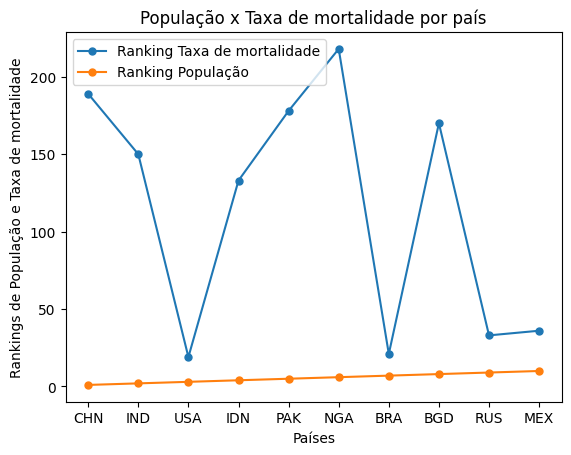

In [139]:
# Cria gráficos
plt.plot(countries_ordered_by_population['iso_code'], countries_ordered_by_population['death_rate_rank'], label='Ranking Taxa de mortalidade', marker='o', markersize=5)
plt.plot(countries_ordered_by_population['iso_code'], countries_ordered_by_population['population_rank'], label='Ranking População', marker='o', markersize=5)

plt.xlabel('Países')
plt.ylabel('Rankings de População e Taxa de mortalidade')
plt.title("População x Taxa de mortalidade por país")
plt.legend()

plt.show()

Resposta: A princípio, há uma correlação negativa entre as medidas. Há países nesse conjunto que tiveram uma taxa de mortalidade muito baixa e há países que estão entre os 40 onde a mortalidade foi mais alta.
Isso fica ainda mais evidente quando usamos a função `corr` para medir a correlação, conforme feito na célula abaixo.

In [140]:
print(countries_ordered_by_population['death_rate_rank'].corr(countries_ordered_by_population['population_rank']))

-0.40535290268155744


#### Pergunta 2: Países com maior índice de rigidez nas restrições tem uma taxa de mortalidade menor?

Para responder essa pergunta irei considerar o índice de rigidez médio do país ao longo de toda a pandemia. Países que mantiveram esse índice alto por mais tempo terão uma média maior do que os outros países, o que creio que seja uma conclusão razoável.

In [141]:
# copia df inicial
vaccines = covid_vaccinations_countries.copy()

# seleciona colunas que utilizarei do df inicial
vaccines = vaccines[['iso_code', 'location','stringency_index']]

# agrupa por país e faz a média do índice de rigidez
vaccines = vaccines.groupby(['iso_code', 'location']).mean().reset_index()

# ordena por média do índice de rigidez
sorted_by_mean_stringency = vaccines.sort_values(by='stringency_index', ascending=False)

sorted_by_mean_stringency

,iso_code,location,stringency_index
38,CHN,China,71.470028
139,MMR,Myanmar,64.979507
91,HND,Honduras,64.075423
13,AZE,Azerbaijan,60.696651
99,IRN,Iran,60.495870
...,...,...,...
231,VCT,Saint Vincent and the Grenadines,NaN
233,VGB,British Virgin Islands,NaN
234,VIR,United States Virgin Islands,NaN
237,WLF,Wallis and Futuna,NaN


In [142]:
# copia df e seleciona colunas que serão usadas
countries_populations_deaths = covid_deaths_countries.copy()
countries_populations_deaths = countries_populations_deaths[['iso_code', 'location', 'population', 'total_deaths']]

# Agrupa os dados por país e pega índices das linhas onde a coluna total_deaths é máxima por país 
total_deaths_by_country_idxs = countries_populations_deaths.groupby('location')['total_deaths'].idxmax()

# Retira países que não tem total_deaths (exemplo: Western Sahara)
total_deaths_by_country_idxs_cleaned = total_deaths_by_country_idxs.dropna(axis=0, how='any')

# Seleciona linhas no df original onde cada país tem o máximo de mortes
total_deaths_by_country = countries_populations_deaths.loc[total_deaths_by_country_idxs_cleaned]

# Ordena por população
countries_ordered_by_population = total_deaths_by_country.sort_values(by=['population'], ascending=False)

# Cria nova coluna com % de mortes
countries_ordered_by_population['death_rate_%'] = countries_ordered_by_population['total_deaths']  * 100 /countries_ordered_by_population['population']

countries_ordered_by_population

,iso_code,location,population,total_deaths,death_rate_%
53856,CHN,China,1425887360,120905.0,0.008479
121971,IND,India,1417173120,531000.0,0.037469
286062,USA,United States,338289856,1118800.0,0.330722
123172,IDN,Indonesia,275501344,161071.0,0.058465
204785,PAK,Pakistan,235824864,30652.0,0.012998
...,...,...,...,...,...
183520,NRU,Nauru,12691,1.0,0.007880
297276,WLF,Wallis and Futuna,11596,7.0,0.060366
224848,BLM,Saint Barthelemy,10994,5.0,0.045479
230978,SPM,Saint Pierre and Miquelon,5885,2.0,0.033985


In [143]:
# Junta os dois dfs criados anteriormente
location_stringency_deathrate = sorted_by_mean_stringency.set_index(['iso_code', 'location']).join(countries_ordered_by_population.set_index('iso_code'))

# Retira linhas em que não há algum dos dados
location_stringency_deathrate = location_stringency_deathrate.dropna(axis=0, how='any')

# cria nova coluna com ranking dos países por índice de rigidez
location_stringency_deathrate['stringency_rank'] = location_stringency_deathrate['stringency_index'].rank(ascending=False)

# Seleciona colunas relevantes
location_stringency_deathrate = location_stringency_deathrate[['stringency_index', 'death_rate_%', 'stringency_rank']]

# Cria nova coluna com ranking dos países por taxa de mortalidade
location_stringency_deathrate['death_rate_%_rank'] = location_stringency_deathrate['death_rate_%'].rank(ascending=False)

location_stringency_deathrate = location_stringency_deathrate.head(10).reset_index()

location_stringency_deathrate

,iso_code,location,stringency_index,death_rate_%,stringency_rank,death_rate_%_rank
0,CHN,China,71.470028,0.008479,1.0,145.0
1,MMR,Myanmar,64.979507,0.035973,2.0,114.0
2,HND,Honduras,64.075423,0.106500,3.0,79.0
3,AZE,Azerbaijan,60.696651,0.098445,4.0,84.0
4,IRN,Iran,60.495870,0.164393,5.0,59.0
5,PHL,Philippines,59.624298,0.057477,6.0,102.0
6,IRQ,Iraq,59.520930,0.057027,7.0,103.0
7,ZWE,Zimbabwe,59.403005,0.034827,8.0,115.0
8,IND,India,58.995581,0.037469,9.0,112.0
9,LBY,Libya,57.884986,0.094490,10.0,88.0


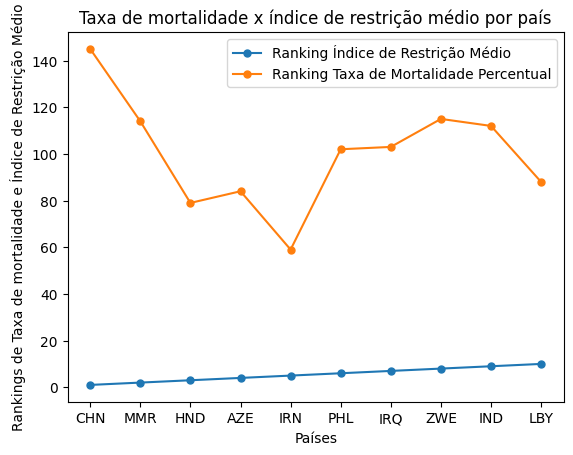

In [144]:
# Cria gráficos
plt.plot(location_stringency_deathrate['iso_code'], location_stringency_deathrate['stringency_rank'], label='Ranking Índice de Restrição Médio', marker='o', markersize=5)
plt.plot(location_stringency_deathrate['iso_code'], location_stringency_deathrate['death_rate_%_rank'], label='Ranking Taxa de Mortalidade Percentual', marker='o', markersize=5)

plt.xlabel('Países')
plt.ylabel('Rankings de Taxa de mortalidade e Índice de Restrição Médio')
plt.title("Taxa de mortalidade x índice de restrição médio por país")
plt.legend()

plt.show()

Resposta: Não há uma correlação clara entre essas duas medidas. Abaixo, o índice de correlação.

In [145]:
print(location_stringency_deathrate['stringency_rank'].corr(location_stringency_deathrate['death_rate_%_rank']))

-0.18993162568338087


#### Pergunta 16: Países com os maiores pibs foram os que tiveram as menores taxas de mortalidade?

In [146]:
# Copia df inicial
vaccinations = covid_vaccinations_countries.copy()

# Agrupa por país e faz a média do PIB(que, a princípio, é sempre o mesmo)
gdp_by_country = vaccinations[['location', 'gdp_per_capita']].groupby('location').agg({
    'gdp_per_capita': 'mean'
}).reset_index()

# Os dados de PIB per capita não batem com aqueles encontrados
# quando fazemos uma pesquisa rápida no Google.
# Ainda assim, são os dados a que temos acesso e continuaremos a análise.
# Esse erro irá influenciar no cálculo do PIB logo adiante.
gdp_by_country

,location,gdp_per_capita
0,Afghanistan,1803.99
1,Albania,11803.43
2,Algeria,13913.84
3,American Samoa,NaN
4,Andorra,NaN
...,...,...
238,Wallis and Futuna,NaN
239,Western Sahara,NaN
240,Yemen,1479.15
241,Zambia,3689.25


In [147]:
# Copia df inicial
deaths = covid_deaths_countries.copy()

# Agrupa por país
location_population_deaths = deaths[['location', 'population', 'total_deaths']].groupby('location').agg({
    'population': 'mean',
    'total_deaths': 'max'
}).reset_index()

location_population_deaths

,location,population,total_deaths
0,Afghanistan,41128772.0,7884.0
1,Albania,2842318.0,3604.0
2,Algeria,44903228.0,6881.0
3,American Samoa,44295.0,34.0
4,Andorra,79843.0,159.0
...,...,...,...
238,Wallis and Futuna,11596.0,7.0
239,Western Sahara,576005.0,NaN
240,Yemen,33696612.0,2159.0
241,Zambia,20017670.0,4057.0


In [148]:
# junta os dois dfs
population_deaths_gdp = gdp_by_country.set_index('location').join(location_population_deaths.set_index('location'))

# Retira linhas que tenham algum NaN e reseta índices
population_deaths_gdp = population_deaths_gdp.dropna(axis=0, how='any').reset_index()

# Calcula PIB com base na população e no PIB per capita (como alertado anteriormente, esses dados não batem com a realidade)
population_deaths_gdp['gdp'] = population_deaths_gdp['gdp_per_capita'] * population_deaths_gdp['population']

# Calcula taxa de mortalidade
population_deaths_gdp['death_rate_%'] = population_deaths_gdp['total_deaths']  * 100 /population_deaths_gdp['population']

# Ordena por PIB
population_deaths_gdp = population_deaths_gdp.sort_values(by='gdp', ascending=False).reset_index(drop=True)

population_deaths_gdp



,location,gdp_per_capita,population,total_deaths,gdp,death_rate_%
0,China,15308.71,1.425887e+09,120905.0,2.182850e+13,0.008479
1,United States,54225.45,3.382899e+08,1118800.0,1.834392e+13,0.330722
2,India,6426.67,1.417173e+09,531000.0,9.107704e+12,0.037469
3,Japan,39002.22,1.239517e+08,74096.0,4.834391e+12,0.059778
4,Germany,45229.25,8.336984e+07,171411.0,3.770755e+12,0.205603
...,...,...,...,...,...,...
186,Micronesia (country),3299.46,1.141780e+05,63.0,3.767257e+08,0.055177
187,Kiribati,1981.13,1.312370e+05,18.0,2.599976e+08,0.013716
188,Palau,13240.41,1.808400e+04,9.0,2.394396e+08,0.049768
189,Nauru,12895.64,1.269100e+04,1.0,1.636586e+08,0.007880


In [149]:
population_deaths_gdp[['location', 'gdp', 'death_rate_%']]

,location,gdp,death_rate_%
0,China,2.182850e+13,0.008479
1,United States,1.834392e+13,0.330722
2,India,9.107704e+12,0.037469
3,Japan,4.834391e+12,0.059778
4,Germany,3.770755e+12,0.205603
...,...,...,...
186,Micronesia (country),3.767257e+08,0.055177
187,Kiribati,2.599976e+08,0.013716
188,Palau,2.394396e+08,0.049768
189,Nauru,1.636586e+08,0.007880


Abaixo, o índice de correlação das duas colunas

In [150]:
population_deaths_gdp['gdp'].corr(population_deaths_gdp['death_rate_%'])

0.04726891227843333

Resposta: Quando analisadas isoladamente, essas variáveis não apresentam relação.<br>
Por um lado, há de se avaliar a validade dos dados pois, conforme alertado, o PIB per capita não está condizente com a realidade.<br>
Por outro lado, países mais pobres como os últimos da tabela tem menor circulação de pessoas saindo e entrando no país, o que pode ter influenciado no trânsito do vírus.<br>
Além disso, outra variável relevante que poderíamos olhar nessa análise seria o índice de restrição.

#### Pergunta 22: Qual o top 10 países com maior índice de ridigez do pais e qual foi seu nível de infecção por densidade populacional?

Vou usar a mesma técnica de cálculo do índice de rigidez da pergunta 2, ou seja, farei a média do índice de rigidez do país ao longo da pandemia.

In [151]:
# copia dfs iniciais
vaccines = covid_vaccinations_cleaned.copy()
deaths = covid_deaths_cleaned.copy()

# Seleciona colunas relevantes
vaccines = vaccines[['location', 'date', 'stringency_index', 'population_density']]
deaths = deaths[['location', 'date', 'population', 'total_cases']]

# Junta os dois dfs
vaccines_deaths = vaccines.merge(deaths, how='inner', on=['location', 'date'])

# Faz agregação por location e define métodos de agregação do restante das colunas
agg_by_location = vaccines_deaths.groupby('location').agg({
    'stringency_index': 'mean',
    'population_density': 'mean',
    'population': 'mean',
    'total_cases': 'max'
}).reset_index()

# Dropa linhas que tenham NaN
agg_by_location = agg_by_location.dropna(axis=0, how='any')

# Ordena por índice de restrição
sorted_by_stringency = agg_by_location.sort_values(by='stringency_index', ascending=False)

# Calcula casos por densidade
sorted_by_stringency['cases_by_density'] = sorted_by_stringency['total_cases']/sorted_by_stringency['population_density']

# Seleciona colunas relevantes e mostra os 10 primeiros
sorted_by_stringency[['location', 'stringency_index', 'population_density', 'total_cases', 'cases_by_density']].reset_index(drop=True).head(10)

,location,stringency_index,population_density,total_cases,cases_by_density
0,China,71.470028,147.67,99239252.0,672033.940543
1,Myanmar,64.979507,81.72,634105.0,7759.483603
2,Honduras,64.075423,82.81,472467.0,5705.434126
3,Azerbaijan,60.696651,119.31,830367.0,6959.743525
4,Iran,60.495870,49.83,7597982.0,152478.065422
5,Philippines,59.624298,351.87,4083678.0,11605.644130
6,Iraq,59.520930,88.13,2465545.0,27976.228299
7,Zimbabwe,59.403005,42.73,264584.0,6191.996256
8,India,58.995581,450.42,44768172.0,99392.060743
9,Libya,57.884986,3.62,507229.0,140118.508287


Não acho que essa pergunta diga muita coisa ou interpretei errado o que ela queria. De qualquer forma, aí estão os dados.

#### Pergunta 23: Países com maior densidade populacional foram mais restritos na rígidez?

In [152]:
# copia df inicial
vaccines = covid_vaccinations_cleaned.copy()

# seleciona colunas que serão necessárias para análise
stringency_popDensity = vaccines[['location', 'stringency_index', 'population_density']]

# Agrupa por país, faz as médias da densidade populacional e do índice de rigidez
stringency_popDensity = stringency_popDensity.groupby('location').agg({
    'stringency_index': 'mean',
    'population_density': 'mean'
}).reset_index()

# Retira quaisquer linhas que tenham algum NaN. 
stringency_popDensity = stringency_popDensity.dropna(axis=0, how='any')

# ordena por índice de restrição
stringency_popDensity = stringency_popDensity.sort_values(by='stringency_index').reset_index(drop=True)
stringency_popDensity

,location,stringency_index,population_density
0,Nicaragua,11.555302,51.67
1,Tanzania,15.248326,64.70
2,Burundi,16.159572,423.06
3,Burkina Faso,20.895274,70.15
4,Niger,21.079330,16.96
...,...,...,...
173,Iran,60.495870,49.83
174,Azerbaijan,60.696651,119.31
175,Honduras,64.075423,82.81
176,Myanmar,64.979507,81.72


In [153]:
print(stringency_popDensity['population_density'].corr(stringency_popDensity['stringency_index']))

-0.034619557130660915


Resposta: Não há correlação entre essas duas grandezas.